In [1]:
!pip install console_progressbar

  Stored in directory: /tmp/.cache/pip/wheels/76/75/2c/d26751f4f3d2cd72d58d10313113691e87995630c89aab231b
Successfully built console-progressbar
You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
# This preprocessing portion of the code is provided by foamliu on his github repo
# https://github.com/foamliu/Car-Recognition/blob/master/pre-process.py

import tarfile
import scipy.io
import numpy as np
import os
import cv2 as cv
import shutil
import random
from console_progressbar import ProgressBar

In [3]:
def ensure_folder(folder):
    if not os.path.exists(folder):
        os.makedirs(folder)

In [4]:
def save_train_data(fnames, labels, bboxes):
    src_folder ='../input/stanford-cars-dataset/cars_train/cars_train/'
    num_samples = len(fnames)

    train_split = 0.8
    num_train = int(round(num_samples * train_split))
    train_indexes = random.sample(range(num_samples), num_train)

    pb = ProgressBar(total=100, prefix='Save train data', suffix='', decimals=3, length=50, fill='=')

    for i in range(num_samples):
        fname = fnames[i]
        label = labels[i]
        (x1, y1, x2, y2) = bboxes[i]

        src_path = os.path.join(src_folder, fname)
        src_image = cv.imread(src_path)
        height, width = src_image.shape[:2]
        # margins of 16 pixels
        margin = 16
        x1 = max(0, x1 - margin)
        y1 = max(0, y1 - margin)
        x2 = min(x2 + margin, width)
        y2 = min(y2 + margin, height)
        # print("{} -> {}".format(fname, label))
        pb.print_progress_bar((i + 1) * 100 / num_samples)

        if i in train_indexes:
            dst_folder = '/kaggle/working/data/train/'
        else:
            dst_folder = '/kaggle/working/data/valid/'

        dst_path = os.path.join(dst_folder, label)
        if not os.path.exists(dst_path):
            os.makedirs(dst_path)
        dst_path = os.path.join(dst_path, fname)

        crop_image = src_image[y1:y2, x1:x2]
        dst_img = cv.resize(src=crop_image, dsize=(img_height, img_width))
        cv.imwrite(dst_path, dst_img)

In [5]:
def save_test_data(fnames, bboxes):
    src_folder = '../input/stanford-cars-dataset/cars_test/cars_test/'
    dst_folder = '/kaggle/working/data/test/'
    num_samples = len(fnames)

    pb = ProgressBar(total=100, prefix='Save test data', suffix='', decimals=3, length=50, fill='=')

    for i in range(num_samples):
        fname = fnames[i]
        (x1, y1, x2, y2) = bboxes[i]
        src_path = os.path.join(src_folder, fname)
        src_image = cv.imread(src_path)
        height, width = src_image.shape[:2]
        # margins of 16 pixels
        margin = 16
        x1 = max(0, x1 - margin)
        y1 = max(0, y1 - margin)
        x2 = min(x2 + margin, width)
        y2 = min(y2 + margin, height)
        # print(fname)
        pb.print_progress_bar((i + 1) * 100 / num_samples)

        dst_path = os.path.join(dst_folder, fname)
        crop_image = src_image[y1:y2, x1:x2]
        dst_img = cv.resize(src=crop_image, dsize=(img_height, img_width))
        cv.imwrite(dst_path, dst_img)

In [6]:
def process_train_data():
    print("Processing train data...")
    cars_annos = scipy.io.loadmat('../input/cars-devkit/cars_train_annos.mat')
    annotations = cars_annos['annotations']
    annotations = np.transpose(annotations)

    fnames = []
    class_ids = []
    bboxes = []
    labels = []

    for annotation in annotations:
        bbox_x1 = annotation[0][0][0][0]
        bbox_y1 = annotation[0][1][0][0]
        bbox_x2 = annotation[0][2][0][0]
        bbox_y2 = annotation[0][3][0][0]
        class_id = annotation[0][4][0][0]
        labels.append('%04d' % (class_id,))
        fname = annotation[0][5][0]
        bboxes.append((bbox_x1, bbox_y1, bbox_x2, bbox_y2))
        class_ids.append(class_id)
        fnames.append(fname)

    labels_count = np.unique(class_ids).shape[0]
    print(np.unique(class_ids))
    print('The number of different cars is %d' % labels_count)

    save_train_data(fnames, labels, bboxes)

In [7]:
def process_test_data():
    print("Processing test data...")
    cars_annos = scipy.io.loadmat('../input/cars-devkit/cars_test_annos.mat')
    annotations = cars_annos['annotations']
    annotations = np.transpose(annotations)

    fnames = []
    bboxes = []

    for annotation in annotations:
        bbox_x1 = annotation[0][0][0][0]
        bbox_y1 = annotation[0][1][0][0]
        bbox_x2 = annotation[0][2][0][0]
        bbox_y2 = annotation[0][3][0][0]
        fname = annotation[0][4][0]
        bboxes.append((bbox_x1, bbox_y1, bbox_x2, bbox_y2))
        fnames.append(fname)

    save_test_data(fnames, bboxes)

In [8]:
img_width, img_height = 224, 224

cars_meta = scipy.io.loadmat('../input/cars-devkit/cars_meta.mat')
class_names = cars_meta['class_names']  # shape=(1, 196)
class_names = np.transpose(class_names)
print('class_names.shape: ' + str(class_names.shape))
print('Sample class_name: [{}]'.format(class_names[8][0][0]))

ensure_folder('/kaggle/working/data/train')
ensure_folder('/kaggle/working/data/valid')
ensure_folder('/kaggle/working/data/test')

process_train_data()
process_test_data()

class_names.shape: (196, 1)
Sample class_name: [Aston Martin V8 Vantage Coupe 2012]
Processing train data...
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196]
The number of different cars is 196
Save train data |==========================================

In [9]:
import torchvision
from fastai.vision import *
from fastai.metrics import error_rate
from fastai import *
import cv2 as cv
import numpy as np
import pandas as pd
import scipy.io as sio

In [10]:
tfms = get_transforms(do_flip=True, flip_vert=False, max_lighting=0.1, max_zoom=1.05,
                      max_warp=0.,
                      xtra_tfms=[rand_crop(), rand_zoom(1, 1.5),
                                 symmetric_warp(magnitude=(-0.2, 0.2))])

data = ImageDataBunch.from_folder('data/','train','valid',
                                  ds_tfms=tfms
                                  ,size=128,bs=64).normalize(imagenet_stats)

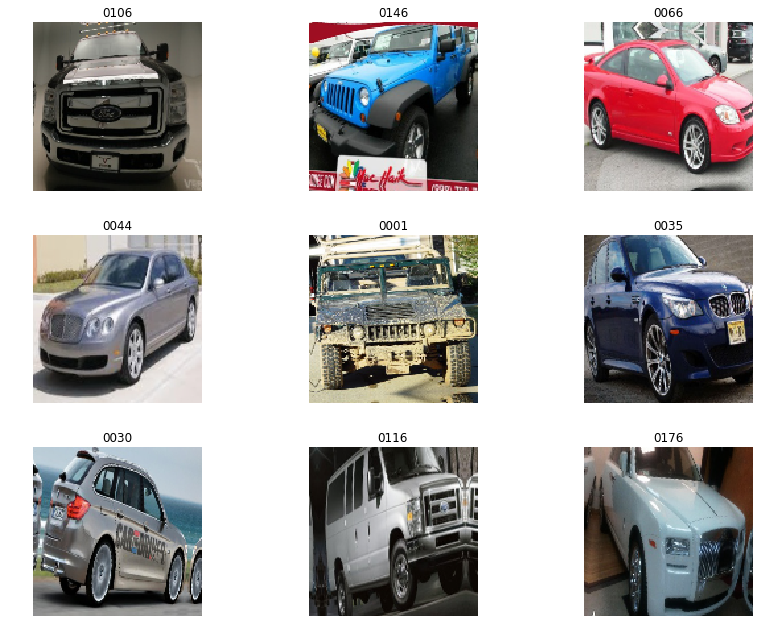

In [11]:
data.show_batch(rows=3, figsize=(12,9))

In [12]:
# class names and number of classes
# print(data.classes)
len(data.classes),data.c

(196, 196)

In [13]:
!pip install pretrainedmodels
import pretrainedmodels

    100% |████████████████████████████████| 61kB 2.4MB/s 
  Stored in directory: /tmp/.cache/pip/wheels/69/df/63/62583c096289713f22db605aa2334de5b591d59861a02c2ecd
Successfully built pretrainedmodels
You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [14]:
from torch import nn
import torch.nn.functional as F

class FocalLoss(nn.Module):
    def __init__(self, alpha=1., gamma=2.):
        super().__init__()
        self.alpha = alpha
        self.gamma = gamma

    def forward(self, inputs, targets, **kwargs):
        CE_loss = nn.CrossEntropyLoss(reduction='none')(inputs, targets)
        pt = torch.exp(-CE_loss)
        F_loss = self.alpha * ((1-pt)**self.gamma) * CE_loss
        return F_loss.mean()

In [15]:
def se_resnext50_32x4d(pretrained=False):
    pretrained = 'imagenet' if pretrained else None
    model = pretrainedmodels.se_resnext50_32x4d(pretrained=pretrained)
    return nn.Sequential(*list(model.children()))

In [16]:
learn = cnn_learner(data, se_resnext50_32x4d, pretrained=True, cut=-2,
                    split_on=lambda m: (m[0][3], m[1]), 
                    metrics=[accuracy])
learn.loss_fn = FocalLoss()

Downloading: "http://data.lip6.fr/cadene/pretrainedmodels/se_resnext50_32x4d-a260b3a4.pth" to /tmp/.torch/models/se_resnext50_32x4d-a260b3a4.pth
110559176it [05:11, 355323.31it/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07


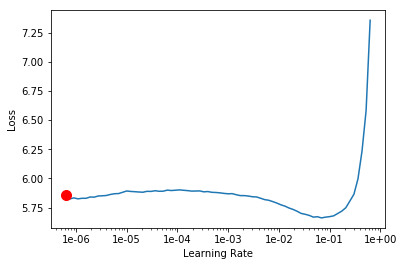

In [17]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [18]:
learn.fit_one_cycle(32, max_lr=slice(2e-2), wd=1e-5)

In [19]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

In [20]:
learn.save('SE_ResNext50_1');
learn.unfreeze();
learn = learn.clip_grad();

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-05


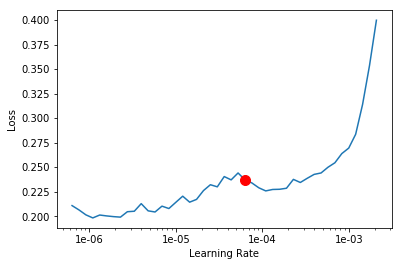

In [21]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [22]:
learn.load('SE_ResNext50_1');
learn.unfreeze();
learn = learn.clip_grad();

In [23]:
lr = [3e-3/100, 3e-3/20, 3e-3/10]
learn.fit_one_cycle(36, lr, wd=1e-7)


In [24]:
learn.save('s2_SeResNext50_2');

# Size 224

In [25]:
SZ = 224
cutout_frac = 0.20
p_cutout = 0.75
cutout_sz = round(SZ*cutout_frac)
cutout_tfm = cutout(n_holes=(1,1), length=(cutout_sz, cutout_sz), p=p_cutout)

tfms = get_transforms(do_flip=True, max_rotate=15, flip_vert=False, max_lighting=0.1,
                      max_zoom=1.05, max_warp=0.,
                      xtra_tfms=[rand_crop(), rand_zoom(1, 1.5),
                                 symmetric_warp(magnitude=(-0.2, 0.2)), cutout_tfm])

In [26]:
data = ImageDataBunch.from_folder('data/','train','valid',
                                  ds_tfms=tfms
                                  ,size=224,bs=32).normalize(imagenet_stats)

learn.data = data
data.train_ds[0][0].shape

torch.Size([3, 224, 224])

In [27]:
learn.load('s2_SeResNext50_2');
learn.freeze();
learn = learn.clip_grad();

In [28]:
learn.loss_func = FocalLoss()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.32E-06


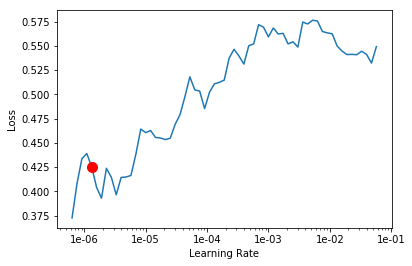

In [29]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [30]:
learn.fit_one_cycle(24, slice(3e-3), wd=5e-6)

In [31]:
learn.save('SeResNxt50_FL_3');
learn.load('SeResNxt50_FL_3');

/opt/conda/lib/python3.6/site-packages/torch/serialization.py:251: UserWarning: Couldn't retrieve source code for container of type FocalLoss. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [32]:
learn.unfreeze();
learn = learn.clip_grad();

In [33]:
lr = [1e-3/200, 1e-3/20, 1e-3/10]
learn.fit_one_cycle(32, lr)

In [34]:
learn.save('SeResNxt50_FL_4');
learn.load('SeResNxt50_FL_4');

/opt/conda/lib/python3.6/site-packages/torch/serialization.py:251: UserWarning: Couldn't retrieve source code for container of type FocalLoss. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


# Size 299

In [35]:
SZ = 299
cutout_frac = 0.20
p_cutout = 0.75
cutout_sz = round(SZ*cutout_frac)
cutout_tfm = cutout(n_holes=(1,1), length=(cutout_sz, cutout_sz), p=p_cutout)

In [36]:
tfms = get_transforms(do_flip=True, max_rotate=15, flip_vert=False, max_lighting=0.1,
                      max_zoom=1.05, max_warp=0.,
                      xtra_tfms=[rand_crop(),
                                 symmetric_warp(magnitude=(-0.2, 0.2)), cutout_tfm])

In [37]:
data = ImageDataBunch.from_folder('data/','train','valid',
                                  ds_tfms=tfms
                                  ,size=SZ,bs=24).normalize(imagenet_stats)

learn.data = data

In [38]:
learn.load('SeResNxt50_FL_4');
learn.freeze();
learn = learn.clip_grad();
learn.mixup();

/opt/conda/lib/python3.6/site-packages/torch/serialization.py:251: UserWarning: Couldn't retrieve source code for container of type FocalLoss. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.29E-02


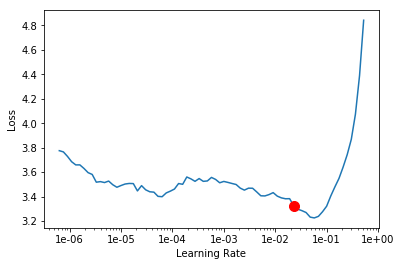

In [39]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [40]:
learn.fit_one_cycle(32, slice(1e-2))

In [41]:
learn.save('SeResNext50_mixup_6');

In [42]:
learn.load('SeResNext50_mixup_6');

/opt/conda/lib/python3.6/site-packages/torch/serialization.py:251: UserWarning: Couldn't retrieve source code for container of type FocalLoss. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [43]:
learn.unfreeze();
learn = learn.clip_grad();
# learn.mixup();

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.29E-06


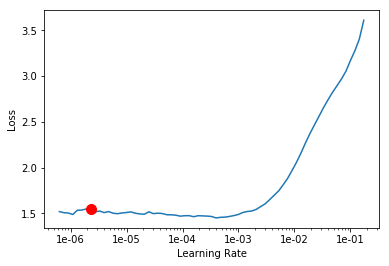

In [44]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [45]:
lr = [2e-5, 2e-4, 2e-3]
learn.fit_one_cycle(64, lr)

In [46]:
learn.export('/kaggle/working/fastai_resnet.pkl');

/opt/conda/lib/python3.6/site-packages/torch/serialization.py:251: UserWarning: Couldn't retrieve source code for container of type FocalLoss. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


# Predicting on the test set

In [47]:
labels = sio.loadmat('../input/cars-devkit/cars_test_annos_withlabels.mat')

In [48]:
x = []
for i in range(8041):
    x.append(np.transpose(np.array(labels['annotations']['fname']))[i][0][0])

In [49]:
df=pd.DataFrame(data=np.transpose(np.array(labels['annotations']['class'],dtype=np.int)),
                  index=x)

df.to_csv('/kaggle/working/data/test_labels.csv')

In [50]:
learn = load_learner('/kaggle/working/','fastai_resnet.pkl', test= 
                     ImageList.from_csv('/kaggle/working/data','test_labels.csv',folder='test'))
preds,y = learn.TTA(ds_type=DatasetType.Test)

In [51]:
pd.DataFrame(preds.cpu().numpy()).to_csv('raw_test_preds.csv',index=False)

In [52]:
a=preds;a.shape
b=np.array(labels['annotations']['class'],dtype=np.int)-1;b.shape 
b = torch.from_numpy(b)

In [53]:
acc=accuracy(a,b);acc

tensor(0.9219)

In [54]:
labelled_preds = torch.argmax(preds,1).cpu().numpy()
out = open('result.txt', 'a')
for val in labelled_preds:
    out.write('{}\n'.format(str(val+1)))
out.close()

In [55]:
!rm -rf data/